In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

import dill

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")

In [2]:
with open(DATAFOLDER / "x_array_with_clusters.pickle", "rb") as f:
    x_array = dill.load(f)

In [3]:
x_array

,id,condition,time,infusiontype,cluster
0,PB23,deplete,0,10NaCl,1
1,PB23,deplete,1,10NaCl,3
2,PB23,deplete,2,10NaCl,1
3,PB23,deplete,3,10NaCl,1
4,PB23,deplete,4,10NaCl,3
...,...,...,...,...,...
475,PB75,replete,7,45NaCl,6
476,PB75,replete,8,45NaCl,3
477,PB75,replete,9,45NaCl,3
478,PB75,replete,10,45NaCl,3


0 0
Analyzing deplete 10NaCl
(7,)
0 1
Analyzing replete 10NaCl
(7,)
1 0
Analyzing deplete 45NaCl
(7,)
1 1
Analyzing replete 45NaCl
(7,)


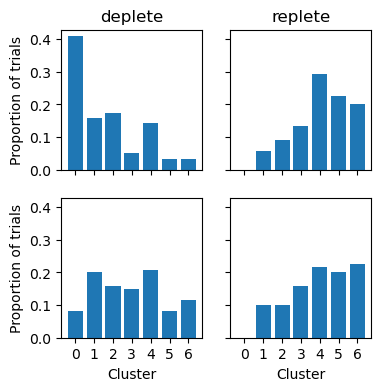

In [10]:
infusiontype = "10NaCl"

df = x_array
n_clusters = len(df.cluster.unique())

f, ax = plt.subplots(ncols=2, nrows=2,
                     figsize=(4, 4),
                     sharey=True, sharex=True)
barx=np.arange(n_clusters)

for row, infusiontype in enumerate(df.infusiontype.unique()):
    for col, condition in enumerate(df.condition.unique()):
        print(row, col)
        print("Analyzing", condition, infusiontype)
        df_temp = df.query("condition == @condition & infusiontype == @infusiontype")
        data_to_plot = (df_temp
                        .groupby("cluster")
                        .count()
                        .reindex(range(0, 7), fill_value=0)  # Ensure clusters 1-7 are present
                        .infusiontype
                        .to_list()
        )
        data_to_plot_as_proportion = data_to_plot / np.sum(data_to_plot)
        print(data_to_plot_as_proportion.shape)
        ax[row,col].bar(barx, data_to_plot_as_proportion)
        # df_condition = df.query("condition == @condition")
        # df_condition = df_condition.sort_values("infusionrate")
        # #plt.plot(df_condition.infusionrate, df_condition.mean, label=condition)
        
    
ax[0,0].set_title("deplete")
ax[0,1].set_title("replete")

for axis in ax[1]:
    axis.set_xticks(barx)
    axis.set_xlabel("Cluster")
    
for axis in [ax[0,0], ax[1,0]]:
    axis.set_ylabel("Proportion of trials")

In [11]:
color_deplete = "xkcd:blue"
color_replete = "xkcd:red"

deplete 10NaCl 494
deplete 45NaCl 491
replete 10NaCl 491
replete 45NaCl 491


Text(0, 0.5, 'Number ')

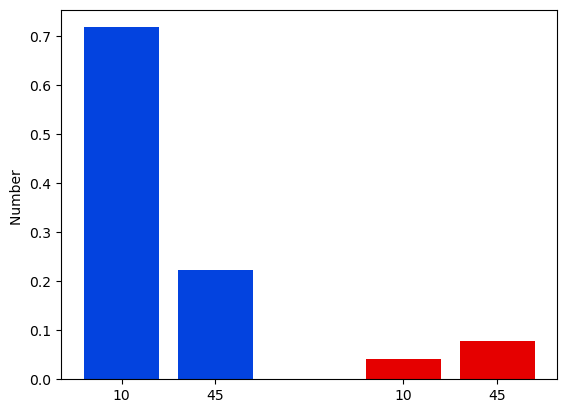

In [26]:
# figure showing proportion of cluster 1 trials
df = x_array

data_for_stats = np.zeros((2,2))
data_to_plot = np.zeros((2,2))

for i, condition in enumerate(df.condition.unique()):
    for j, infusiontype in enumerate(df.infusiontype.unique()):
        df_temp = df.query("condition == @condition & infusiontype == @infusiontype" )
        data_for_stats[i,j] = len(df_temp.query("cluster == 0"))
        data_to_plot[i,j] = len(df_temp.query("cluster == 0")) / len(df_temp)
        print(condition, infusiontype, len(df_temp))
        
f, ax = plt.subplots()
x = [1,2,4,5]
y = data_to_plot.flatten()
ax.bar(x,y, color=[color_deplete, color_deplete, color_replete, color_replete])
ax.set_xticks(x, labels=["10", "45", "10", "45"])

ax.set_ylabel("Number ")

In [27]:
data_to_plot

array([[0.71862348, 0.22403259],
       [0.0407332 , 0.07739308]])

In [28]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(data_for_stats)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)



Chi-square statistic: 42.497233032866006
P-value: 7.0782284939704e-11
Degrees of freedom: 1
Expected frequencies:
[[333.41300191 131.58699809]
 [ 41.58699809  16.41300191]]


In [31]:
with open(DATAFOLDER / "snips_data_selected_conditions.pickle", "rb") as f:
    data = dill.load(f)

snips_10NaCl = data["snips_10NaCl_selected"]
snips_45NaCl = data["snips_45NaCl_selected"]

In [32]:
snips_all = np.vstack([snips_10NaCl, snips_45NaCl])

In [33]:
snips_all.shape

(1967, 200)

In [34]:
len(x_array)

1967

Cluster 1


NameError: name 'snips_all' is not defined

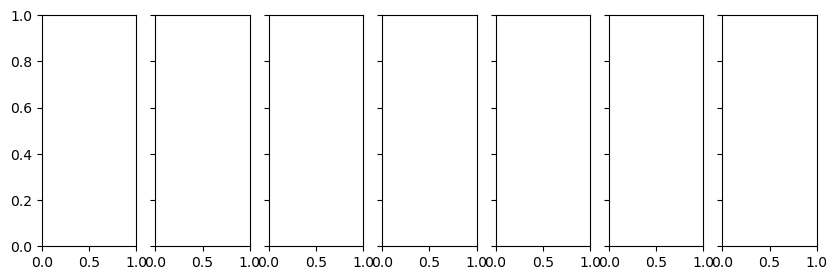

In [12]:
f, ax = plt.subplots(ncols=len(x_array.cluster.unique()), sharey=True, figsize=(10, 3))

for cluster in x_array.cluster.unique():
    print("Cluster", cluster)
    snips_cluster = snips_all[x_array.cluster == cluster, :]
    x = np.arange(snips_cluster.shape[1]) / 10
    mean = np.mean(snips_cluster, axis=0)
    sem = np.std(snips_cluster, axis=0) / np.sqrt(snips_cluster.shape[0])
    sd = np.std(snips_cluster, axis=0)
    print(len(mean), len(sem))
    
    print(snips_cluster.shape)
    ax[cluster].plot(x, np.mean(snips_cluster, axis=0))
    ax[cluster].fill_between(x, mean-sd, mean+sd, alpha=0.5)
    ax[cluster].set_title(f"Cluster {cluster+1}")

for axis in ax:
    axis.set_xlabel("Time (s)")
    axis.set_xticks([5, 15], labels = ["0", "10"])
    axis.axvline(5, color="k", linestyle="--", alpha=0.3)
    axis.axvline(15, color="k", linestyle="--", alpha=0.3)
    
ax[0].set_ylabel("Z-score")

In [13]:
df = x_array

def get_prop_of_cluster(df, cluster, condition, infusiontype):
    df_temp = (df
               .query("condition == @condition & infusiontype == @infusiontype")
               )
               
    prop_by_trial = []

    for trial in df_temp.trial.unique():
        n = len(df_temp.query("trial == @trial"))
        n_cluster = len(df_temp.query("trial == @trial & cluster == @cluster"))
        prop_by_trial.append(n_cluster / n)
    
    return prop_by_trial

p = get_prop_of_cluster(df, 0, "thirsty", "45NaCl")

AttributeError: 'DataFrame' object has no attribute 'trial'

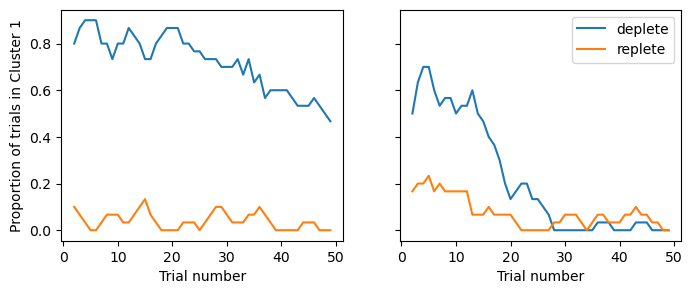

In [10]:
df = x_array

f, ax = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)

cluster=0

infusiontype = "10NaCl"
for condition in df.condition.unique():
        prop_by_trial = get_prop_of_cluster(df, cluster, condition, infusiontype)
        df_to_plot = pd.DataFrame({"prop": prop_by_trial})
        df_to_plot.rolling = df_to_plot.prop.rolling(window=3).mean()
        ax[0].plot(df_to_plot.rolling, label=f"{condition} cluster {cluster}")
        
infusiontype = "45NaCl"
for condition in df.condition.unique():
        prop_by_trial = get_prop_of_cluster(df, cluster, condition, infusiontype)
        df_to_plot = pd.DataFrame({"prop": prop_by_trial})
        df_to_plot.rolling = df_to_plot.prop.rolling(window=3).mean()
        ax[1].plot(df_to_plot.rolling, label=condition)
        
ax[1].legend()

ax[0].set_ylabel("Proportion of trials in Cluster 1")

for axis in ax:
        axis.set_xlabel("Trial number")
        #axis.set_ylim(0, 1)